In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Bow_data = pd.read_csv('..\HandTrackingData\Bow.csv')
Bow_data = Bow_data.to_numpy()

Sword_data = pd.read_csv('..\HandTrackingData\Sword.csv')
Sword_data = Sword_data.to_numpy()

Pistol_data = pd.read_csv('..\HandTrackingData\Pistol.csv')
Pistol_data = Pistol_data.to_numpy()

MachineGun_data = pd.read_csv('..\HandTrackingData\MachineGun.csv')
MachineGun_data = MachineGun_data.to_numpy()

Spear_data = pd.read_csv('..\HandTrackingData\Spear.csv')
Spear_data = Spear_data.to_numpy()

Granade_data = pd.read_csv('..\HandTrackingData\Granade.csv')
Granade_data = Granade_data.to_numpy()

print(Bow_data.shape)
print(Sword_data.shape)
print(Pistol_data.shape)
print(MachineGun_data.shape)
print(Spear_data.shape)
print(Granade_data.shape)

(1600, 115)
(1600, 115)
(1600, 115)
(1600, 115)
(1600, 115)
(1600, 115)


In [4]:
Bow_data_Seq= []
Sword_data_Seq = []
Pistol_data_Seq = []
MachineGun_data_Seq = []
Spear_data_Seq = []
Granade_data_Seq = []


Objects = ['Bow','Sword', 'Pistol', 'MachineGun', 'Spear', 'Granade']
WindowSize = 80

In [5]:

def Create_Sequences(data, window_size):
    """
    주어진 데이터와 윈도우 크기를 기반으로 시퀀스를 생성합니다.

    Args:
        data (list or np.ndarray): 입력 데이터
        window_size (int): 시퀀스의 윈도우 크기

    Returns:
        np.ndarray: 생성된 시퀀스 배열
    """
    
    Sequences = []
    for seq in range(len(data) - window_size):
        Sequences.append(data[seq:seq + window_size])
    return np.array(Sequences)

In [6]:
Bow_data_Seq = Create_Sequences(Bow_data, WindowSize)
Sword_data_Seq = Create_Sequences(Sword_data, WindowSize)
Pistol_data_Seq = Create_Sequences(Pistol_data, WindowSize)
MachineGun_data_Seq = Create_Sequences(MachineGun_data, WindowSize)
Spear_data_Seq = Create_Sequences(Spear_data, WindowSize)
Granade_data_Seq = Create_Sequences(Granade_data, WindowSize)

In [7]:
print(Bow_data_Seq.shape)
print(Sword_data_Seq.shape)
print(Pistol_data_Seq.shape)
print(MachineGun_data_Seq.shape)
print(Spear_data_Seq.shape)
print(Granade_data_Seq.shape)

(1520, 80, 115)
(1520, 80, 115)
(1520, 80, 115)
(1520, 80, 115)
(1520, 80, 115)
(1520, 80, 115)


In [8]:
ConcatenatedSeqData = np.concatenate([Bow_data_Seq, Sword_data_Seq , Pistol_data_Seq, MachineGun_data_Seq, Spear_data_Seq, Granade_data_Seq], axis=0)

ConcatenatedSeqData.shape

(9120, 80, 115)

In [9]:
X_data = ConcatenatedSeqData[:, :, :-1]
Labels = ConcatenatedSeqData[:, 0, -1]

print(X_data.shape)
print(X_data)

print(Labels.shape)
print(Labels)

(9120, 80, 114)
[[[-9.32825600e+01 -1.27967470e+01  1.15828284e+02 ... -3.68596800e+00
   -6.78190840e+01  2.82692500e+00]
  [-4.03930000e-02 -6.27400000e-02  5.72440000e-02 ... -3.68854300e+00
   -6.77668680e+01  2.82596900e+00]
  [-4.18490000e-02 -4.81050000e-02  5.47050000e-02 ... -3.69147700e+00
   -6.77072190e+01  2.82485700e+00]
  ...
  [-5.99038000e-01  1.98948000e-01  1.11982000e-01 ... -3.52313300e+00
   -7.10901000e+01  2.88299600e+00]
  [-7.47828000e-01  2.74867000e-01  8.50860000e-02 ... -3.52478900e+00
   -7.10571220e+01  2.88247900e+00]
  [-5.65437000e-01 -2.45000000e-04  2.51484000e-01 ... -3.52636900e+00
   -7.10256460e+01  2.88198400e+00]]

 [[-4.03930000e-02 -6.27400000e-02  5.72440000e-02 ... -3.68854300e+00
   -6.77668680e+01  2.82596900e+00]
  [-4.18490000e-02 -4.81050000e-02  5.47050000e-02 ... -3.69147700e+00
   -6.77072190e+01  2.82485700e+00]
  [-3.81070000e-02 -1.88040000e-02  3.49650000e-02 ... -3.69473300e+00
   -6.76412590e+01  2.82362700e+00]
  ...
  [-7.4

In [10]:
from tensorflow.keras.utils import to_categorical

Y_data = to_categorical(Labels, num_classes=len(Objects))

print(Y_data)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [11]:
from sklearn.model_selection import train_test_split

X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.float32)

X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=2024)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(7296, 80, 114) (7296, 6)
(1824, 80, 114) (1824, 6)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='tanh', input_shape=X_train.shape[1:3]),
    Dense(32, activation='tanh'),
    Dense(len(Objects), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                45824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 48,102
Trainable params: 48,102
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model6.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
227/228 [============================>.] - ETA: 0s - loss: 0.3861 - acc: 0.9480
Epoch 1: val_acc improved from -inf to 1.00000, saving model to models\model6.h5
228/228 [==============================] - 9s 33ms/step - loss: 0.3846 - acc: 0.9482 - val_loss: 0.0516 - val_acc: 1.0000 - lr: 0.0010
Epoch 2/100
227/228 [============================>.] - ETA: 0s - loss: 0.0280 - acc: 1.0000
Epoch 2: val_acc did not improve from 1.00000
228/228 [==============================] - 9s 39ms/step - loss: 0.0280 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 1.0000 - lr: 0.0010
Epoch 3/100
227/228 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 1.0000
Epoch 3: val_acc did not improve from 1.00000
228/228 [==============================] - 8s 36ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000 - lr: 0.0010
Epoch 4/100
227/228 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 1.0000
Epoch 4: val_acc did not improve from 1.00000
228/228 

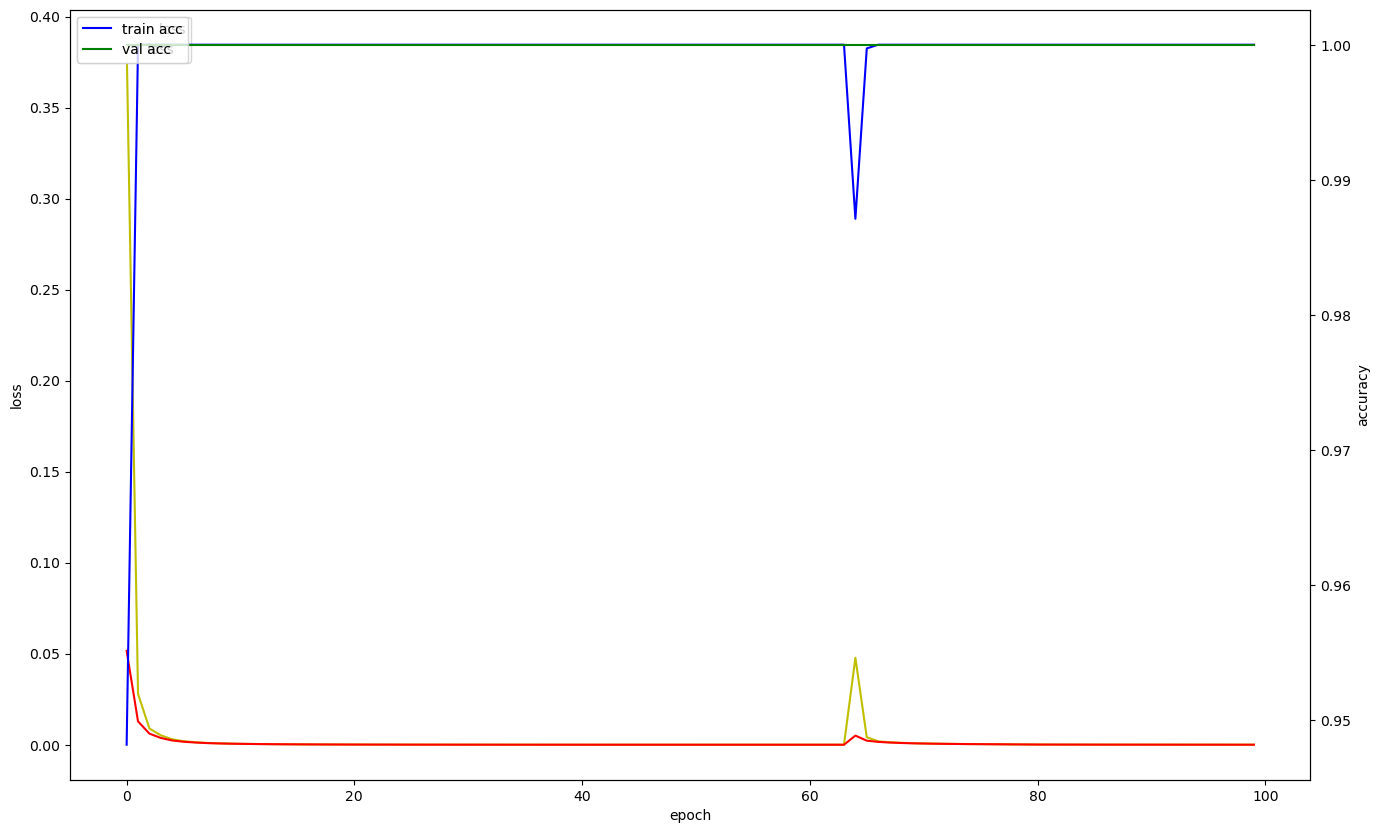

In [14]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
import tensorflow as tf

# .h5 모델 로드
h5_model_path = "models\model6.h5"
saved_model_path = "models\model6_tf"

model = tf.keras.models.load_model(h5_model_path)

# SavedModel 형식으로 저장
tf.saved_model.save(model, saved_model_path)

print(f"SavedModel saved at: {saved_model_path}")

#tf python -m tf2onnx.convert --saved-model C:\Project\saved_model --output C:\Project\model2.onnx
#python -m tf2onnx.convert --saved-model tensorflow-model-path --output model.onnx
#python -m tf2onnx.convert --input model3.h5 --output model33.onnx
#python -m tf2onnx.convert --saved-model path/to/saved_model --output model.onnx --input-shape "1,80,138"

INFO:tensorflow:Assets written to: models\model6_tf\assets


INFO:tensorflow:Assets written to: models\model6_tf\assets


SavedModel saved at: models\model6_tf


In [23]:
import tf2onnx
import tensorflow as tf

# TensorFlow SavedModel 경로 및 변환된 ONNX 모델 저장 경로
saved_model_path = "models\model6.h5"
onnx_model_path = "models\model6.onnx"

# 변환에 사용할 입력 shape
input_signature = [tf.TensorSpec([1, 80, 114], tf.float32, name="input")]

# SavedModel 로드
model = tf.keras.models.load_model(saved_model_path)

# ONNX로 변환
offset = 0
onnx_model, _ = tf2onnx.convert.from_keras(
    model,
    input_signature=input_signature,
    opset=13  # ONNX opset 버전 지정 (13은 일반적으로 사용되는 버전)
)

# ONNX 모델 저장
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved at: {onnx_model_path}")

ONNX model saved at: models\model6.onnx


In [25]:
import onnx

# onnx 파일 구조 파악.
onnx_model = onnx.load("models\model6.onnx")
onnx.checker.check_model(onnx_model)

print(onnx.helper.printable_graph(onnx_model.graph))

graph tf2onnx (
  %input[FLOAT, 1x80x114]
) initializers (
  %sequential/dense_1/MatMul/ReadVariableOp:0[FLOAT, 32x6]
  %sequential/dense_1/BiasAdd/ReadVariableOp:0[FLOAT, 6]
  %sequential/dense/MatMul/ReadVariableOp:0[FLOAT, 64x32]
  %sequential/dense/BiasAdd/ReadVariableOp:0[FLOAT, 32]
  %new_shape__44[INT64, 3]
  %const_starts__39[INT64, 1]
  %const_fold_opt__45[FLOAT, 1x1x64]
  %const_ends__40[INT64, 1]
  %const_axes__43[INT64, 1]
  %const_axes__31[INT64, 1]
  %W0__25[FLOAT, 1x256x114]
  %R0__26[FLOAT, 1x256x64]
  %B0__27[FLOAT, 1x512]
) {
  %sequential/lstm/PartitionedCall/transpose:0 = Reshape(%input, %new_shape__44)
  %LSTM__28:0, %LSTM__28:1, %LSTM__28:2 = LSTM[activations = ['Sigmoid', 'Tanh', 'Tanh'], direction = 'forward', hidden_size = 64](%sequential/lstm/PartitionedCall/transpose:0, %W0__25, %R0__26, %B0__27, %, %const_fold_opt__45, %const_fold_opt__45)
  %Squeeze__32:0 = Squeeze(%LSTM__28:0, %const_axes__31)
  %sequential/lstm/PartitionedCall/strided_slice_2:0 = Slice(%S